In [1]:
# The Effects of External Factors on Students Learning Math
# CS 577: Semester Project
# https://www.kaggle.com/datasets/janiobachmann/math-students

# citation
# P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance.
# In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference 
# (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

In [2]:
# The purpose of this project is to see the effects of external factors on a student's education
# Columns such as reason and guardian are excluded as they are factors that cannot be explicitly controlled
# Columns such as famsize, traveltime, nursery, health, and internet, while not factors that can be explicitly controlled, are still included as they are related to other factors, serve as the basis for other factors
# Columns such as sex and age are excluded as they can introduce ethical problems/bias
# Students from 'MS' / Mousinho da Silveira are not included in this data as they make up only 12% of the dataset and could possibly skew the results

In [3]:
# ORIGINAL COLUMNS

# school, sex, age, address, famsize, pstatus, medu, fedu, mjob, fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, 
# activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3

In [4]:
# NEW COLUMNS (split datasets by school - MS, GP)

# address (U - urban, R - rural)
# famsize (LE3 - <= 3, GT3 - > 3)
# pstatus (cohabitation status: A - apart, T - living together)
# medu (mother education: 0 - none, 1 - primary/4th grade, 2 - 5th-9th grade, 3 - secondary, 
#       4 - higher)
# fedu (father education)
# mjob (mother job: teacher, health - health care, services - civil services/police/administrative,
#       at home, other)
# fjob (father job)
# traveltime (home to school travel time: 1 - < 15 min, 2 - 15-30 min, 3 - 30 min-1 hr, 4 - > 1 hr)
# studytime (weekly study time: 1 - < 2 hr, 2 - 2-5 hr, 3 - 5-10 hr, 4 - > 10 hr)
# freetime (free time after school: 1 - very low, 5 - very high)
# failures (# of past class fails: n - num of fails if < 3 fails, 4 - 4+ fails)
# schoolsup (extra edu support: y (1), n (0))
# famsup (fam edu support: y (1), n (0))
# paid (extra paid support: y (1), n (0))
# activities (extra-curriculars: y (1), n (0))
# nursery (nursery school: y (1), n (0))
# higher (wants higher edu: y (1), n (0))
# internet (internet access: y (1), n (0))
# romantic (romantic relationship: y (1), n (0))
# famrel (quality of fam relationships: 1 - very bad, 5 - excellent)
# goout (going out w friends: 1 - very low, 5 - very high)
# health (current health: 1 - very bad, 5 - very good)
# absences (# of absences: 0-93)
# alc_avg (avg alcohol consumption on weekdays and weekends: 1 - very low, 5 - very high)
# G_avg (avg grades of 1st/2nd/final: 0-20)

In [31]:
# imports
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# data cleaning of overall dataset

# data taken from math students database
df = pd.read_csv("student-mat.csv")
data = df.drop(columns=['reason','guardian','sex','age'])

# replace y, n of extra edu support columns with 1, 0 (schoolsup, famsup, paid)
cols_rep = ['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']
data[cols_rep] = data[cols_rep].replace({'yes': 1, 'no': 0})

# average of workday and weekend alcohol consumption
data["alc_avg"] = data[['Dalc', 'Walc']].mean(axis=1)

# average of G1, G2, G3 grades in math (1st, 2nd, final grades)
data["G_avg"] = data[['G1', 'G2', 'G2']].mean(axis=1)

# students from Gabriel Pereira school, drop repeated columns
data_GP = data.loc[data['school']=='GP']
data_GP = data_GP.drop(columns=['school','Dalc','Walc'])
data_GP

,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,...,famrel,freetime,goout,health,absences,G1,G2,G3,alc_avg,G_avg
0,U,GT3,A,4,4,at_home,teacher,2,2,0,...,4,3,4,3,6,5,6,6,1.0,5.666667
1,U,GT3,T,1,1,at_home,other,1,2,0,...,5,3,3,3,4,5,5,6,1.0,5.000000
2,U,LE3,T,1,1,at_home,other,1,2,3,...,4,3,2,3,10,7,8,10,2.5,7.666667
3,U,GT3,T,4,2,health,services,1,3,0,...,3,2,2,5,2,15,14,15,1.0,14.333333
4,U,GT3,T,3,3,other,other,1,2,0,...,4,3,2,5,4,6,10,10,1.5,8.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,U,GT3,T,2,3,at_home,other,1,3,0,...,4,3,3,3,4,11,10,10,1.5,10.333333
345,U,GT3,T,3,2,other,services,1,3,0,...,5,4,3,1,7,13,13,14,2.5,13.000000
346,R,GT3,T,4,3,teacher,services,1,3,0,...,5,3,2,4,9,16,15,16,1.5,15.333333
347,U,GT3,T,4,3,teacher,other,1,3,0,...,5,4,5,5,0,10,10,9,2.5,10.000000


address
U    286
R     63
Name: count, dtype: int64


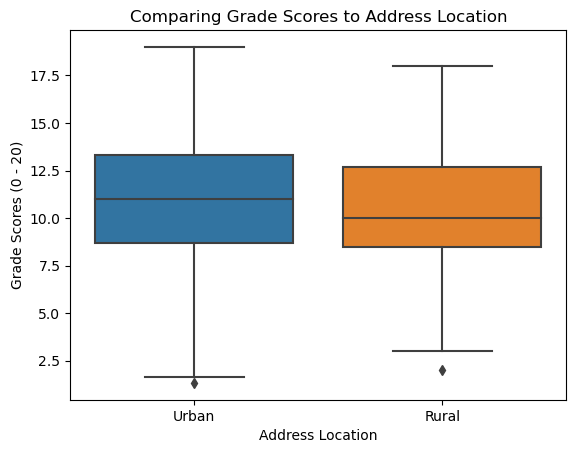

In [33]:
# ADDRESS - URBAN/RURAL

# new dataframe to hold simplified data
cols_addr_size = ['address','G3','G_avg']
data_addr = data_GP[cols_addr_size]

# plot boxplot
ax = (data_addr.set_index('address').pipe((sns.boxplot, 'data'), x=data_addr['address'], y=data_addr['G_avg']))
ax.set(xlabel ="Address Location", ylabel = "Grade Scores (0 - 20)", title ='Comparing Grade Scores to Address Location')
ax.set_xticklabels(["Urban","Rural"])

print(data_addr['address'].value_counts())

famsize
GT3    252
LE3     97
Name: count, dtype: int64


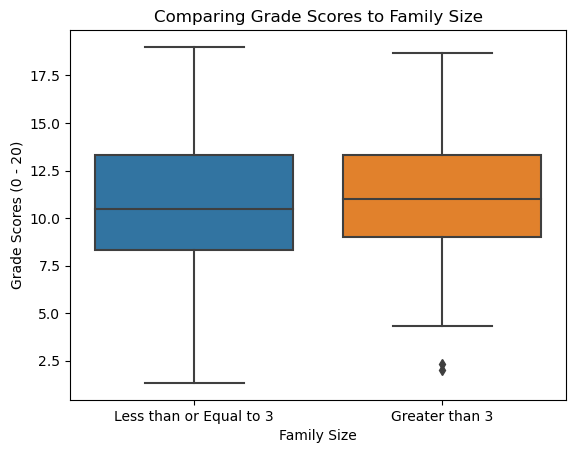

In [34]:
# FAMSIZE - LESS THAN 3/GREATER THAN OR EQUAL TO 3

# new dataframe to hold simplified data
cols_fam_size = ['famsize','G_avg']
data_fam = data_GP[cols_fam_size]

# plot boxplot
ax = (data_fam.set_index('famsize').pipe((sns.boxplot, 'data'), x=data_fam['famsize'], y=data_fam['G_avg']))
ax.set(xlabel ="Family Size", ylabel = "Grade Scores (0 - 20)", title ='Comparing Grade Scores to Family Size')
ax.set_xticklabels(["Less than or Equal to 3","Greater than 3"])

print(data_fam['famsize'].value_counts())

Pstatus
T    311
A     38
Name: count, dtype: int64


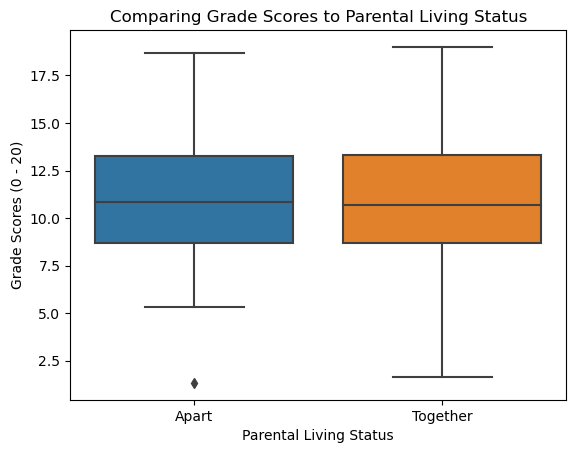

In [35]:
# PARENTAL LIVING STATUS (PSTATUS) - APART/TOGETHER

# new dataframe to hold simplified data
cols_pstat = ['Pstatus','G_avg']
data_pstat = data_GP[cols_pstat]

# plot boxplot
ax = (data_pstat.set_index('Pstatus').pipe((sns.boxplot, 'data'), x=data_pstat['Pstatus'], y=data_pstat['G_avg']))
ax.set(xlabel ="Parental Living Status", ylabel = "Grade Scores (0 - 20)", title ='Comparing Grade Scores to Parental Living Status')
ax.set_xticklabels(["Apart","Together"])\

print(data_pstat['Pstatus'].value_counts())

Medu
4    120
2     96
3     88
1     42
0      3
Name: count, dtype: int64
Fedu
2    103
3     90
4     87
1     67
0      2
Name: count, dtype: int64


C:\Users\steph\AppData\Local\Temp\ipykernel_13072\1818533582.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pedu['n_higher'] = np.select(conditions, choices, default=0)


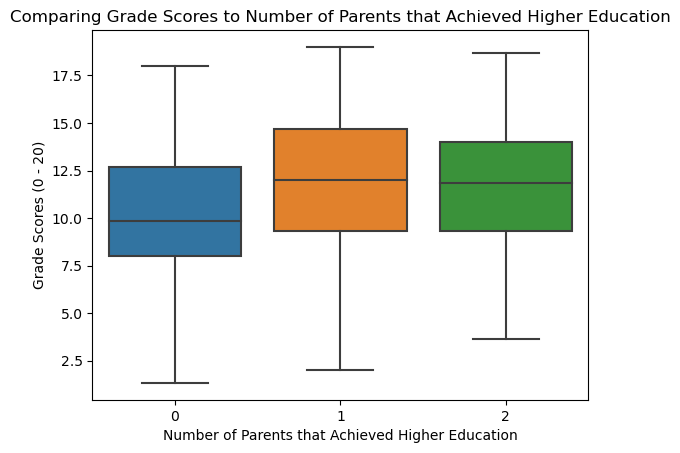

In [36]:
# NUMBER OF PARENTS WHO ACHIEVED HIGHER EDUCATION (MEDU, FEDU) - 0, 1, 2

# new dataframe to hold simplified data
cols_pedu = ['Medu','Fedu','G_avg']
data_pedu = data_GP[cols_pedu]

# create new column to count how many parents achieved higher education
conditions = [
    (data_pedu['Medu'] != 4) & (data_pedu['Fedu'] != 4),
    (data_pedu['Medu'] == 4) & (data_pedu['Fedu'] != 4),
    (data_pedu['Medu'] != 4) & (data_pedu['Fedu'] == 4),
    (data_pedu['Medu'] == 4) & (data_pedu['Fedu'] == 4)]
choices = [0, 1, 1, 2]
data_pedu['n_higher'] = np.select(conditions, choices, default=0)

# plot boxplot
ax = (data_pedu.set_index('n_higher').pipe((sns.boxplot, 'data'), x=data_pedu['n_higher'], y=data_pedu['G_avg']))
ax.set(xlabel ="Number of Parents that Achieved Higher Education", ylabel = "Grade Scores (0 - 20)", title ='Comparing Grade Scores to Number of Parents that Achieved Higher Education')

print(data_pedu['Medu'].value_counts())
print(data_pedu['Fedu'].value_counts())

Mjob
other       122
services     94
teacher      52
at_home      49
health       32
Name: count, dtype: int64


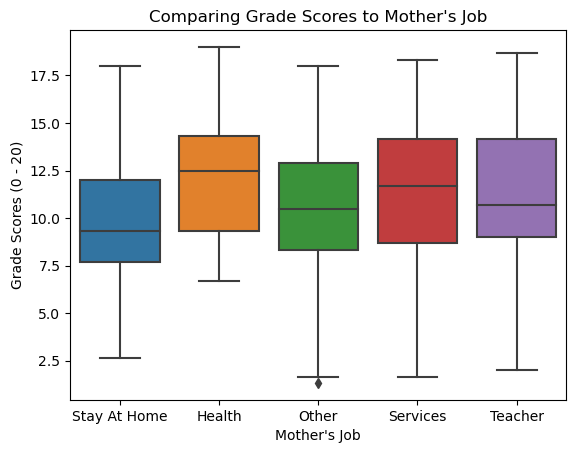

In [37]:
# MOTHER'S JOB (MJOB) - AT HOME, HEALTH, OTHER, SERVICES, TEACHER

# new dataframe to hold simplified data
cols_mjob = ['Mjob','G_avg']
data_mjob = data_GP[cols_mjob]

# plot boxplot
ax = (data_mjob.set_index('Mjob').pipe((sns.boxplot, 'data'), x=data_mjob['Mjob'], y=data_mjob['G_avg']))
ax.set(xlabel ="Mother's Job", ylabel = "Grade Scores (0 - 20)", title ='Comparing Grade Scores to Mother\'s Job')
ax.set_xticklabels(["Stay At Home","Health","Other","Services","Teacher"])

print(data_mjob['Mjob'].value_counts())

Fjob
other       196
services     92
teacher      27
health       18
at_home      16
Name: count, dtype: int64


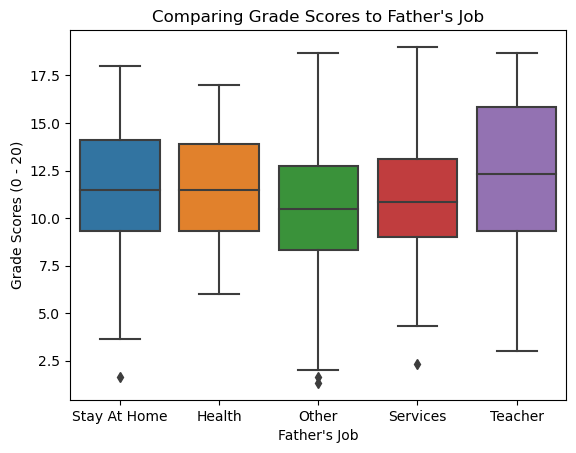

In [38]:
# FATHER'S JOB (FJOB) - AT HOME, HEALTH, OTHER, SERVICES, TEACHER

# new dataframe to hold simplified data
cols_fjob = ['Fjob','G_avg']
data_fjob = data_GP[cols_fjob]

# plot boxplot
ax = (data_fjob.set_index('Fjob').pipe((sns.boxplot, 'data'), x=data_fjob['Fjob'], y=data_fjob['G_avg'],order=["at_home","health","other","services","teacher"]))
ax.set(xlabel ="Father's Job", ylabel = "Grade Scores (0 - 20)", title ='Comparing Grade Scores to Father\'s Job')
ax.set_xticklabels(["Stay At Home","Health","Other","Services","Teacher"])

print(data_fjob['Fjob'].value_counts())

traveltime
1    243
2     84
3     15
4      7
Name: count, dtype: int64


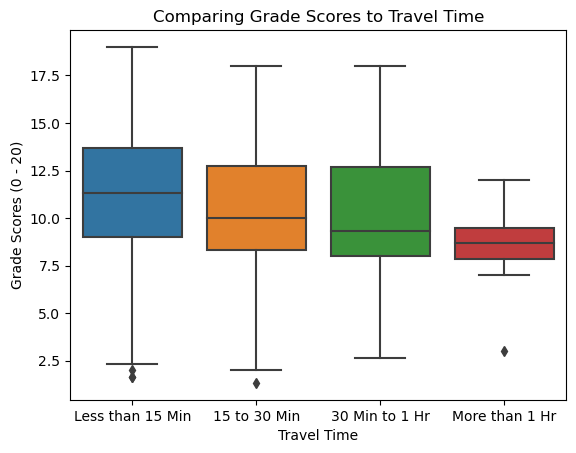

In [39]:
# TRAVELTIME - <15 MIN/15 - 30 MIN/30 MIN - 1 HR/> 1 HR

# new dataframe to hold simplified data
cols_travel = ['traveltime','G_avg']
data_travel = data_GP[cols_travel]

# plot boxplot
ax = (data_travel.set_index('traveltime').pipe((sns.boxplot, 'data'), x=data_travel['traveltime'], y=data_travel['G_avg']))
ax.set(xlabel ="Travel Time", ylabel = "Grade Scores (0 - 20)", title ='Comparing Grade Scores to Travel Time')
ax.set_xticklabels(["Less than 15 Min","15 to 30 Min","30 Min to 1 Hr","More than 1 Hr"])

print(data_travel['traveltime'].value_counts())

studytime
2    176
1     89
3     57
4     27
Name: count, dtype: int64


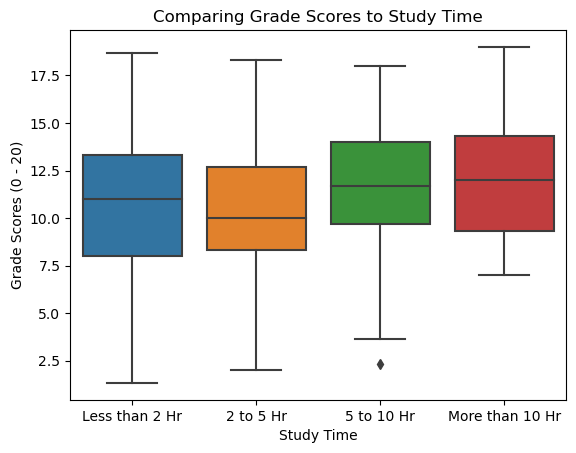

In [40]:
# STUDYTIME - <2 HR/2 - 5 HR/5 - 10 HR/> 10 HR

# new dataframe to hold simplified data
cols_study = ['studytime','G_avg']
data_study = data_GP[cols_study]

# plot boxplot
ax = (data_study.set_index('studytime').pipe((sns.boxplot, 'data'), x=data_study['studytime'], y=data_study['G_avg']))
ax.set(xlabel ="Study Time", ylabel = "Grade Scores (0 - 20)", title ='Comparing Grade Scores to Study Time')
ax.set_xticklabels(["Less than 2 Hr","2 to 5 Hr","5 to 10 Hr","More than 10 Hr"])

print(data_study['studytime'].value_counts())

freetime
3    143
4    101
2     55
5     33
1     17
Name: count, dtype: int64


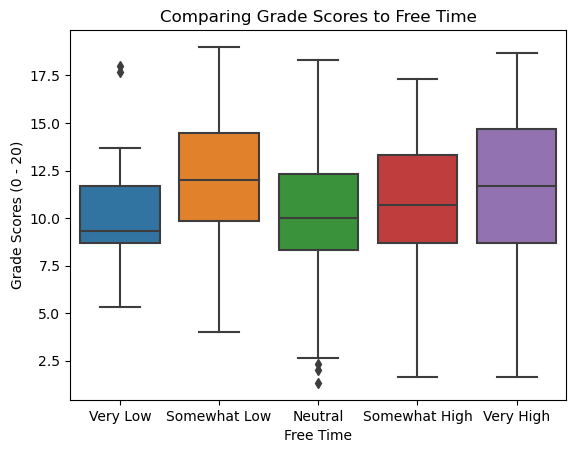

In [41]:
# FREETIME - VERY LOW-VERY HIGH

# new dataframe to hold simplified data
cols_free = ['freetime','G_avg']
data_free = data_GP[cols_free]

# plot boxplot
ax = (data_free.set_index('freetime').pipe((sns.boxplot, 'data'), x=data_free['freetime'], y=data_free['G_avg']))
ax.set(xlabel ="Free Time", ylabel = "Grade Scores (0 - 20)", title ='Comparing Grade Scores to Free Time')
ax.set_xticklabels(["Very Low","Somewhat Low","Neutral","Somewhat High","Very High"])

print(data_free['freetime'].value_counts())

failures
0    280
1     41
3     14
2     14
Name: count, dtype: int64


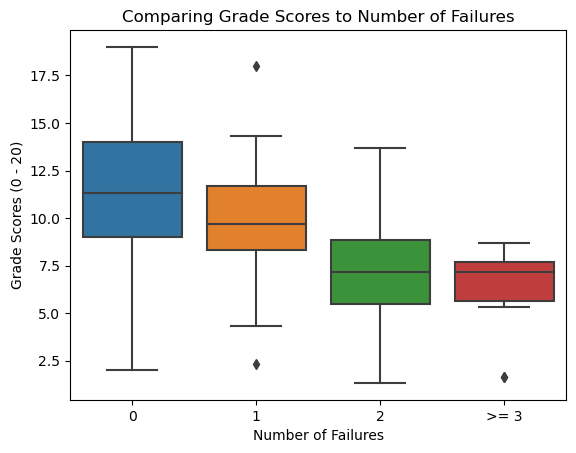

In [42]:
# FAILURES - 0, 1, 2, >=3

# new dataframe to hold simplified data
cols_fail = ['failures','G_avg']
data_fail = data_GP[cols_fail]

# plot boxplot
ax = (data_fail.set_index('failures').pipe((sns.boxplot, 'data'), x=data_fail['failures'], y=data_fail['G_avg']))
ax.set(xlabel ="Number of Failures", ylabel = "Grade Scores (0 - 20)", title ='Comparing Grade Scores to Number of Failures')
ax.set_xticklabels([0, 1, 2, '>= 3'])

print(data_fail['failures'].value_counts())

n_supp
2.0    128
1.0    123
0.0     79
3.0     19
Name: count, dtype: int64


C:\Users\steph\AppData\Local\Temp\ipykernel_13072\923636726.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_edu_supp.loc[:, 'n_supp'] = data_edu_supp[cols_add_edu].sum(axis=1)
C:\Users\steph\AppData\Local\Temp\ipykernel_13072\923636726.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_edu.n_supp = data_edu.n_supp.astype(float)


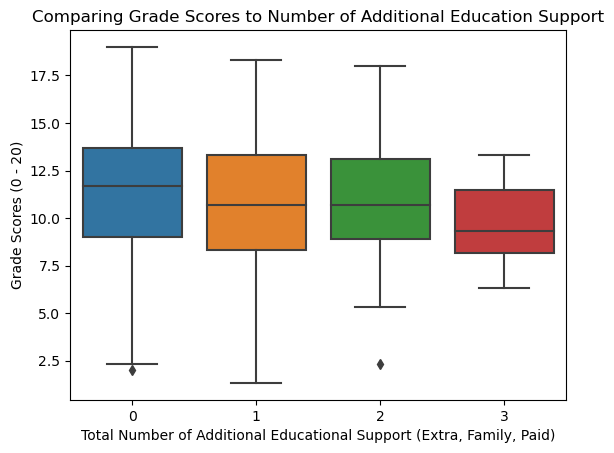

In [43]:
# NUM OF ADDITIONAL EDUCATIONAL SUPPORT (SCHOOLSUP, FAMSUP, PAID) - 0, 1, 2, 3

# new dataframe to hold simplified data
cols_edu = ['schoolsup','famsup','paid','G_avg']
data_edu_supp = data_GP[cols_edu]

# sum up number of additional educational support
cols_add_edu = ['schoolsup','famsup','paid']
data_edu_supp.loc[:, 'n_supp'] = data_edu_supp[cols_add_edu].sum(axis=1)

# create a boxplot to show ranges of grade averages against 0-3 total additional educational support
cols_simple_edu = ['n_supp','G_avg']
data_edu = data_edu_supp[cols_simple_edu]
data_edu.n_supp = data_edu.n_supp.astype(float)
simp_edu = data_edu.sort_values('n_supp')

# plot boxplot
ax = (simp_edu.set_index('n_supp').pipe((sns.boxplot, 'data'), x=simp_edu['n_supp'], y=simp_edu['G_avg'], order=[0,1,2,3]))
ax.set(xlabel ="Total Number of Additional Educational Support (Extra, Family, Paid)", ylabel = "Grade Scores (0 - 20)", title ='Comparing Grade Scores to Number of Additional Education Support')

print(simp_edu['n_supp'].value_counts())

activities
1    185
0    164
Name: count, dtype: int64


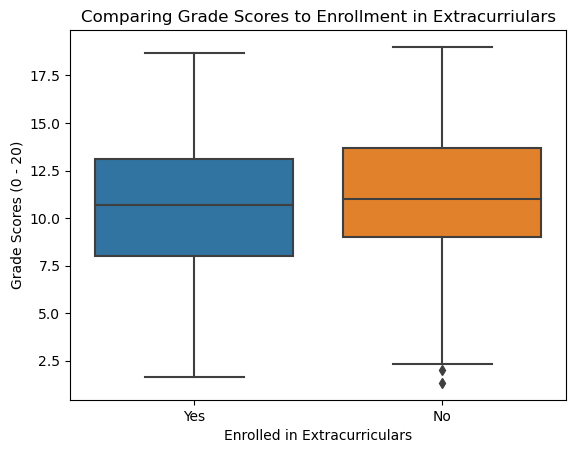

In [45]:
# ENROLLED IN EXTARCURRICULARS (ACTIVITIES) - Y/N

# new dataframe to hold simplified data
cols_act = ['activities','G_avg']
data_act = data_GP[cols_act]

# plot boxplot
ax = (data_act.set_index('activities').pipe((sns.boxplot, 'data'), x=data_act['activities'], y=data_act['G_avg']))
ax.set(xlabel ="Enrolled in Extracurriculars", ylabel = "Grade Scores (0 - 20)", title ='Comparing Grade Scores to Enrollment in Extracurriulars')
ax.set_xticklabels(["Yes","No"])

print(data_act['activities'].value_counts())

nursery
1    282
0     67
Name: count, dtype: int64


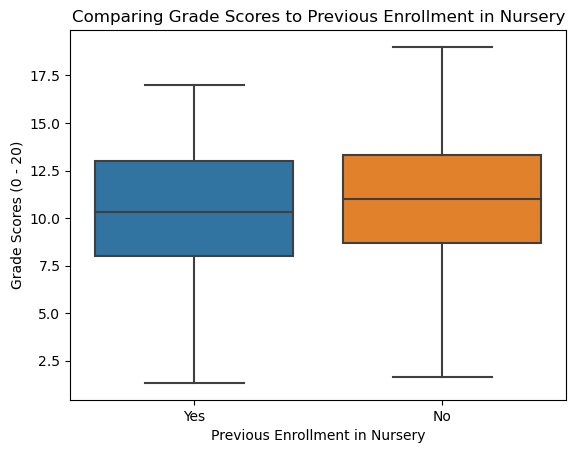

In [46]:
# PREVIOUS ENROLLMENT IN NURSERY (NURSERY) - Y/N

# new dataframe to hold simplified data
cols_nur = ['nursery','G_avg']
data_nur = data_GP[cols_nur]

# plot boxplot
ax = (data_nur.set_index('nursery').pipe((sns.boxplot, 'data'), x=data_nur['nursery'], y=data_nur['G_avg']))
ax.set(xlabel ="Previous Enrollment in Nursery", ylabel = "Grade Scores (0 - 20)", title ='Comparing Grade Scores to Previous Enrollment in Nursery')
ax.set_xticklabels(["Yes","No"])

print(data_nur['nursery'].value_counts())

higher
1    332
0     17
Name: count, dtype: int64


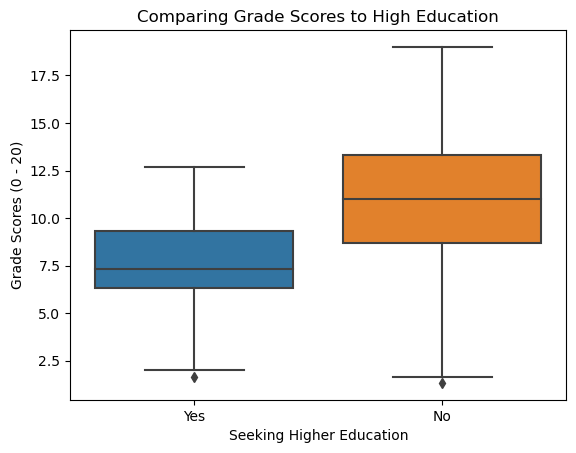

In [47]:
# WANTS HIGHER EDUCATION (HIGHER) - Y/N

# new dataframe to hold simplified data
cols_hi = ['higher','G_avg']
data_hi = data_GP[cols_hi]

# plot boxplot
ax = (data_hi.set_index('higher').pipe((sns.boxplot, 'data'), x=data_hi['higher'], y=data_hi['G_avg']))
ax.set(xlabel ="Seeking Higher Education", ylabel = "Grade Scores (0 - 20)", title ='Comparing Grade Scores to High Education')
ax.set_xticklabels(["Yes","No"])

print(data_hi['higher'].value_counts())

internet
1    297
0     52
Name: count, dtype: int64


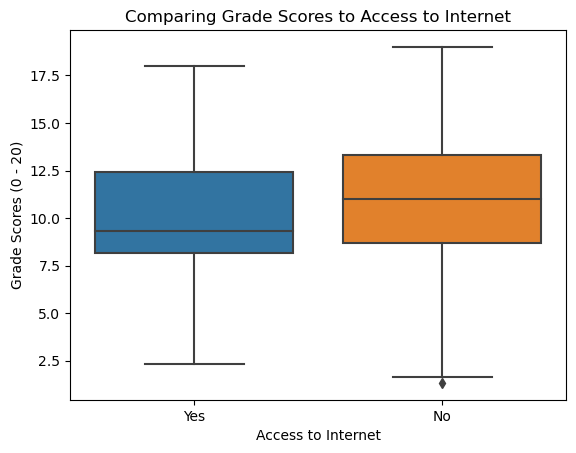

In [49]:
# HAS ACCESS TO INTERNET (INTERNET) - Y/N

# new dataframe to hold simplified data
cols_int = ['internet','G_avg']
data_int = data_GP[cols_int]

# plot boxplot
ax = (data_int.set_index('internet').pipe((sns.boxplot, 'data'), x=data_int['internet'], y=data_int['G_avg']))
ax.set(xlabel ="Access to Internet", ylabel = "Grade Scores (0 - 20)", title ='Comparing Grade Scores to Access to Internet')
ax.set_xticklabels(["Yes","No"])

print(data_int['internet'].value_counts())

romantic
0    236
1    113
Name: count, dtype: int64


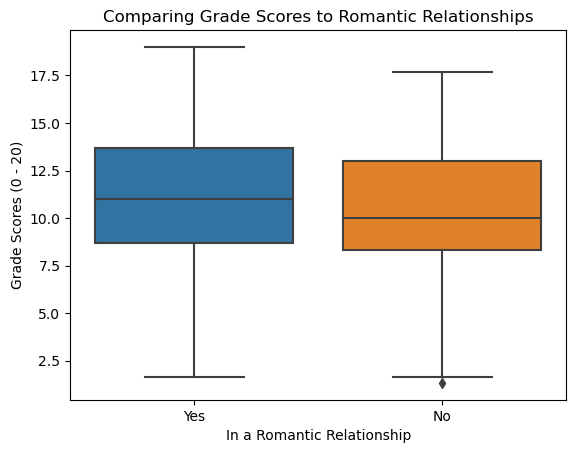

In [50]:
# IN A ROMANTIC RELATIONSHIP (ROMANTIC) - Y/N

# new dataframe to hold simplified data
cols_rr = ['romantic','G_avg']
data_rr = data_GP[cols_rr]

# plot boxplot
ax = (data_rr.set_index('romantic').pipe((sns.boxplot, 'data'), x=data_rr['romantic'], y=data_rr['G_avg']))
ax.set(xlabel ="In a Romantic Relationship", ylabel = "Grade Scores (0 - 20)", title ='Comparing Grade Scores to Romantic Relationships')
ax.set_xticklabels(["Yes","No"])

print(data_rr['romantic'].value_counts())

famrel
4    176
5     93
3     59
2     15
1      6
Name: count, dtype: int64


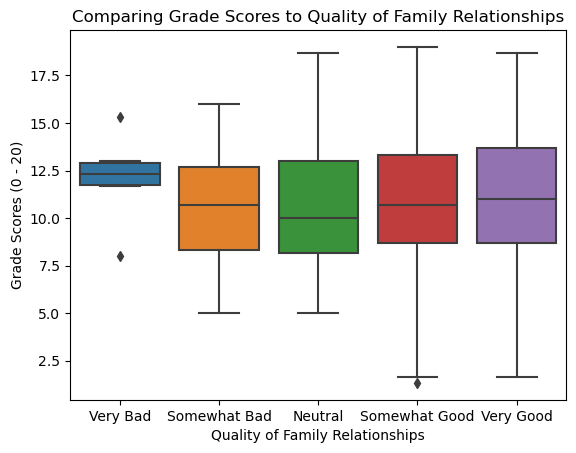

In [51]:
# QUALITY OF FAMILY RELATIONSHIPS (FAMREL) - VERY BAD-VERY GOOD

# new dataframe to hold simplified data
cols_famrel = ['famrel','G_avg']
data_famrel = data_GP[cols_famrel]

# plot boxplot
ax = (data_famrel.set_index('famrel').pipe((sns.boxplot, 'data'), x=data_famrel['famrel'], y=data_famrel['G_avg']))
ax.set(xlabel ="Quality of Family Relationships", ylabel = "Grade Scores (0 - 20)", title ='Comparing Grade Scores to Quality of Family Relationships')
ax.set_xticklabels(["Very Bad","Somewhat Bad","Neutral","Somewhat Good","Very Good"])

print(data_famrel['famrel'].value_counts())

goout
3    113
2     93
4     74
5     49
1     20
Name: count, dtype: int64


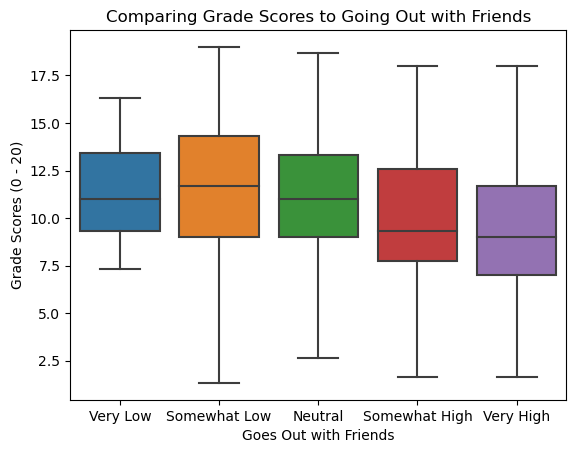

In [52]:
# GOES OUT WITH FRIENDS (GOOUT) - VERY LOW-VERY HIGH

# new dataframe to hold simplified data
cols_go = ['goout','G_avg']
data_go = data_GP[cols_go]

# plot boxplot
ax = (data_go.set_index('goout').pipe((sns.boxplot, 'data'), x=data_go['goout'], y=data_go['G_avg']))
ax.set(xlabel ="Goes Out with Friends", ylabel = "Grade Scores (0 - 20)", title ='Comparing Grade Scores to Going Out with Friends')
ax.set_xticklabels(["Very Low","Somewhat Low","Neutral","Somewhat High","Very High"])

print(data_go['goout'].value_counts())

absences
0     99
2     59
4     44
6     31
8     20
10    15
12    12
14    10
16     7
3      5
18     5
7      5
20     4
9      3
5      3
13     3
15     3
22     3
1      3
11     2
38     1
75     1
40     1
19     1
30     1
24     1
21     1
28     1
56     1
26     1
54     1
25     1
23     1
Name: count, dtype: int64


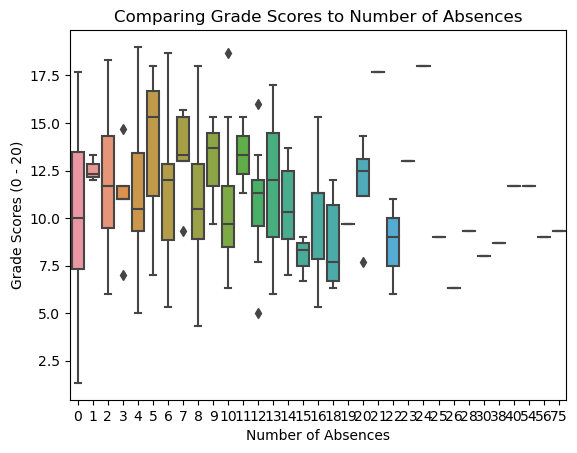

In [56]:
# ABSENCES

# new dataframe to hold simplified data
cols_abs = ['absences','G_avg']
data_abs = data_GP[cols_abs]

# plot boxplot
ax = (data_abs.set_index('absences').pipe((sns.boxplot, 'data'), x=data_abs['absences'], y=data_abs['G_avg']))
ax.set(xlabel ="Number of Absences", ylabel = "Grade Scores (0 - 20)", title ='Comparing Grade Scores to Number of Absences')

print(data_abs['absences'].value_counts())

alc_avg
1.0    140
1.5     57
2.0     52
2.5     38
3.0     29
3.5     13
4.0      9
5.0      8
4.5      3
Name: count, dtype: int64


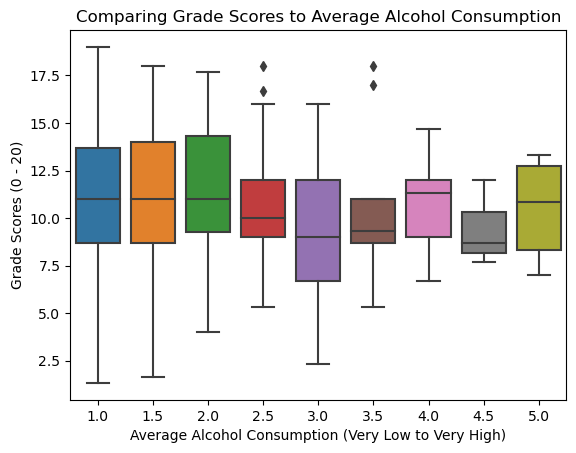

In [53]:
# AVERAGE ALCOHOL CONSUMPTION (DALC, WALC) - VERY LOW-VERY HIGH

# new dataframe to hold simplified data
cols_alc = ['alc_avg','G_avg']
data_alc = data_GP[cols_alc]

# plot boxplot
ax = (data_alc.set_index('alc_avg').pipe((sns.boxplot, 'data'), x=data_alc['alc_avg'], y=data_alc['G_avg']))
ax.set(xlabel ="Average Alcohol Consumption (Very Low to Very High)", ylabel = "Grade Scores (0 - 20)", title ='Comparing Grade Scores to Average Alcohol Consumption')

print(data_alc['alc_avg'].value_counts())